In [37]:
%load_ext autoreload
%autoreload 2
import h5py, os
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution() 
import glob
import matplotlib.pyplot as plt
from scipy import signal
import json
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

def plot_fft_auto(base_dir):
    out_file = os.path.join(base_dir, 'cov_and_fft.h5')
    num_labels = 7
    h5f = h5py.File(out_file, 'r')
    fft = np.array(h5f['fft']).astype(np.float32)
    fig, axs = plt.subplots(2, num_labels, figsize=(20,10))
    for i in range(num_labels):
        avg_fft = np.average(fft, axis=0)[:,i]
        axs[0,i].plot(avg_fft)
        axs[1,i].plot(autocorr(avg_fft), c='r')
    fig.tight_layout()


***Fold change bigwig FFT and autocorrelation plots***

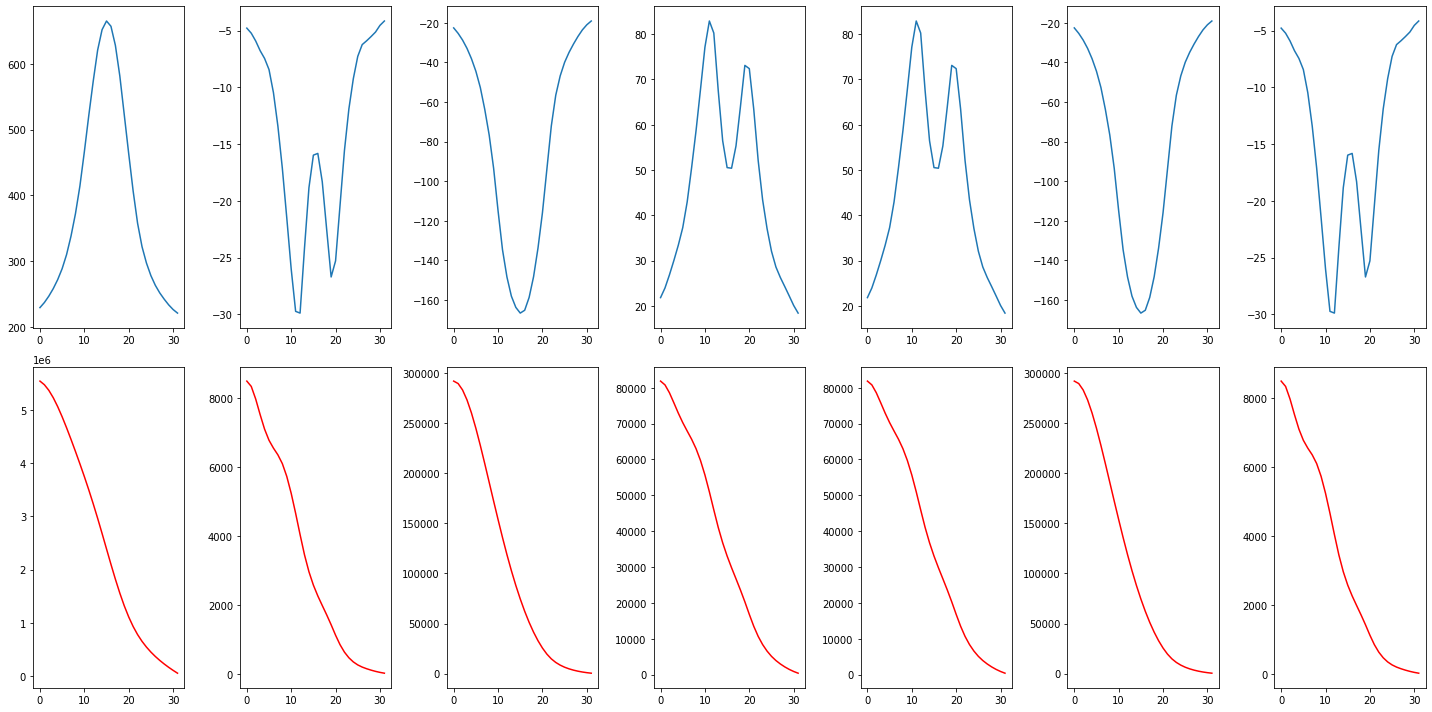

In [39]:
plot_fft_auto('/home/shush/profile/basenji/data/HepG2_fold/')


***Significant p value bigwig FFT and autocorrelation plots***

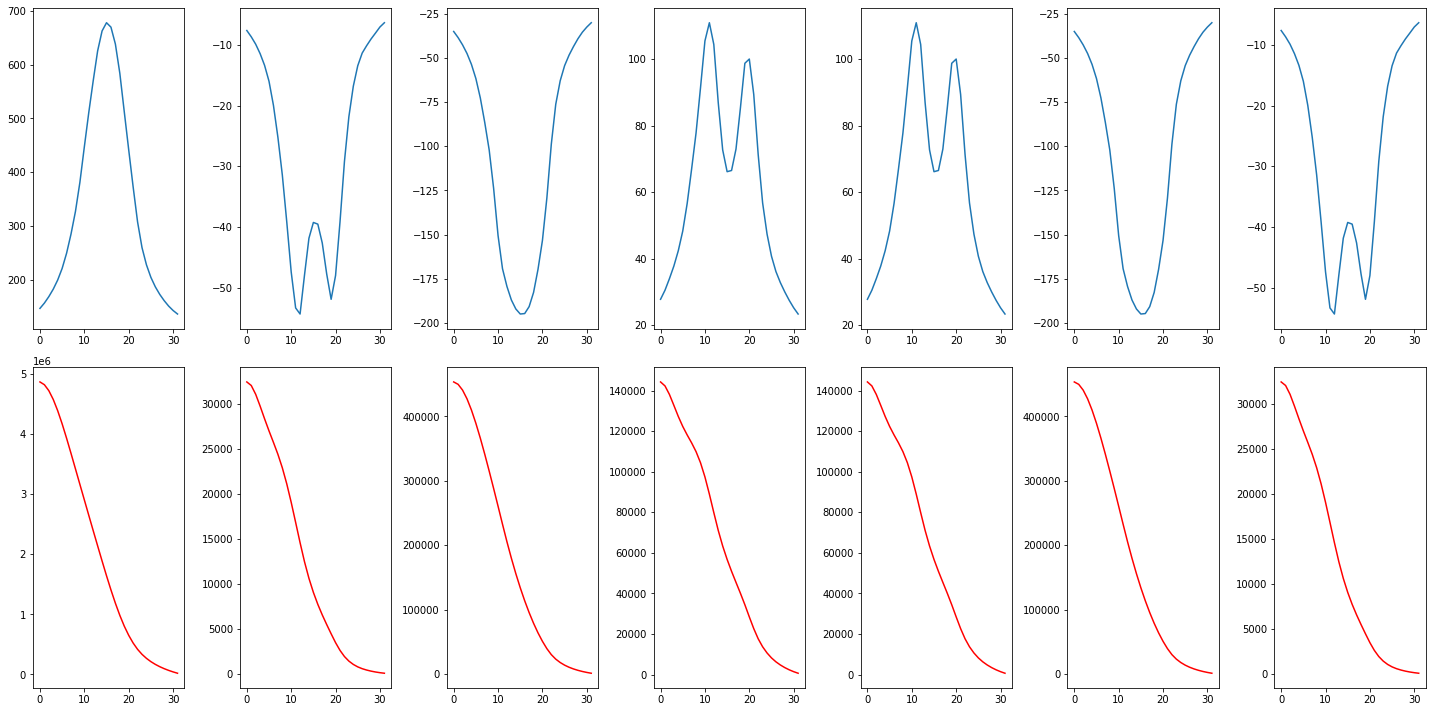

In [40]:
plot_fft_auto('/home/shush/profile/basenji/data/HepG2_sign/')



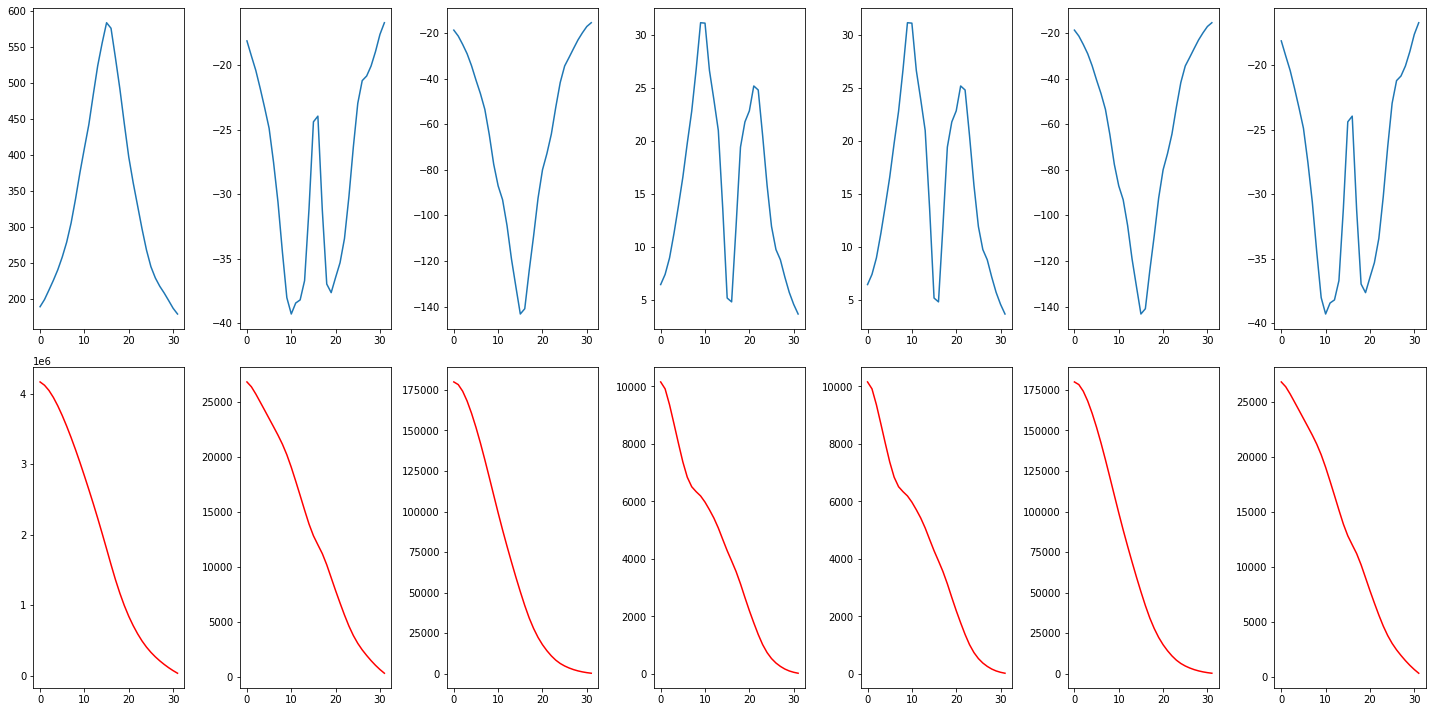

In [42]:
plot_fft_auto('/home/shush/profile/basenji/data/HepG2_raw/')